<a href="https://colab.research.google.com/github/iamcm1401/cm-1/blob/master/logisticregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

%matplotlib inline

In [5]:
cancer = load_breast_cancer()

In [7]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

after attriubutes info next step is features and target then we have concate it
dataframe=combines both input output

In [9]:
features = pd.DataFrame(cancer.data, columns = cancer.feature_names)
target = pd.DataFrame(cancer.target, columns = ['Target'])
data = pd.concat([features, target], axis=1)

corelating the data and sorting it using pearson

In [11]:
a = data.corr('pearson')
abs(a.loc['Target']).sort_values(ascending = False)

Target                     1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

normalizing the data
worst concave points will be high corelative 
'r.' means graph will be in dots
'r+' means graph will be in +

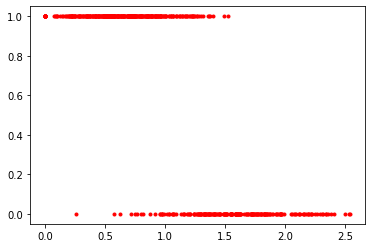

In [12]:
x = np.array(data['worst concave points'])
y = np.array(data['Target'])

x = x/x.mean()

plt.plot(x,y,'r.')

Training and testing the dataset

In [34]:
n = int(0.8* len(x))
x_train = x[:n]
y_train = y[:n]
 
x_test = x[n:]
y_test = y[n:]

sigmoid function for logistic regression

In [31]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

error function

In [36]:
def error(a,b,x,y):
  error = 0
  m=len(x)
  for i in range(m):
    z=a*x[i]+b
    error +=y[i]*np.log(sigmoid(z)) + (1-y[i])*np.log(1-sigmoid(z))
  return(-1/m)*error

grad is diffrention 
a&b

In [38]:
def step_gradient(a,b,x,y,learning_rate):
  grad_a = 0
  grad_b = 0
  m= len(x)
  for i in range(m):
    z = a*x[i] + b
    grad_a +=1/m * (sigmoid(z)-y[i])*x[i]
    grad_b +=1/m *(sigmoid(z)-y[i])
    a = a-(grad_a * learning_rate)
    b = b-(grad_b * learning_rate)

    return a,b

In [39]:
def descend(initial_a, initial_b,x,y,learning_rate,iterations):
  a=initial_a
  b=initial_b
  for i in range(iterations):
    e=error(a,b,x,y)
    if i%1000==0:
      print(f'Error:{e}')
      a,b = step_gradient(a,b,x,y,learning_rate)
    return a,b
    

In [40]:
def accuracy(theta,a,b,x,y):
  count = 0
  for j in range(len(x)):
    test = sigmoid(theta)

    if test[j]>0.9:
      z=1
    else:
      z=0
    if y[j]==z:
      count+=1
  acc = count/len(y)
  print(f"Error is {100-(acc*100)}")


In [42]:
a=1
b=1
learning_rate=0.01
iterations=10000
final_a, final_b =descend(a,b,x_train,y_train,learning_rate,iterations)

Error:1.1971440889391973


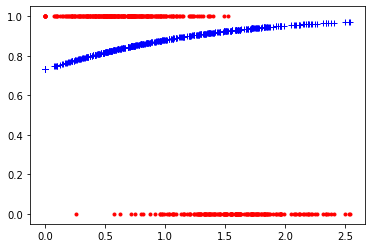

In [45]:
f=final_a * x_train + final_b
plt.plot(x_train,y_train,'r.',x_train, sigmoid(f),'b+')